<a href="https://colab.research.google.com/github/vbhaktha13/ML/blob/main/NN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [3]:
pip install sklearn

In [4]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X,y = make_blobs(n_samples=200,centers=2,n_features=2,random_state=1)
scalar=MinMaxScaler()
scalar.fit(X)
X=scalar.transform(X)

In [6]:
#train test split
X_train,y_train = X[:160],y[:160]  #split 160:40
X_test,y_test=X[160:],y[160:]

<function matplotlib.pyplot.show>

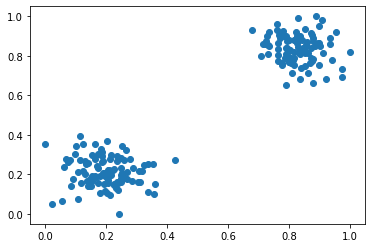

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.show

In [9]:
model=Sequential()
model.add(Dense(4,input_dim=2,activation='linear'))
model.add(Dense(4,activation='linear'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
